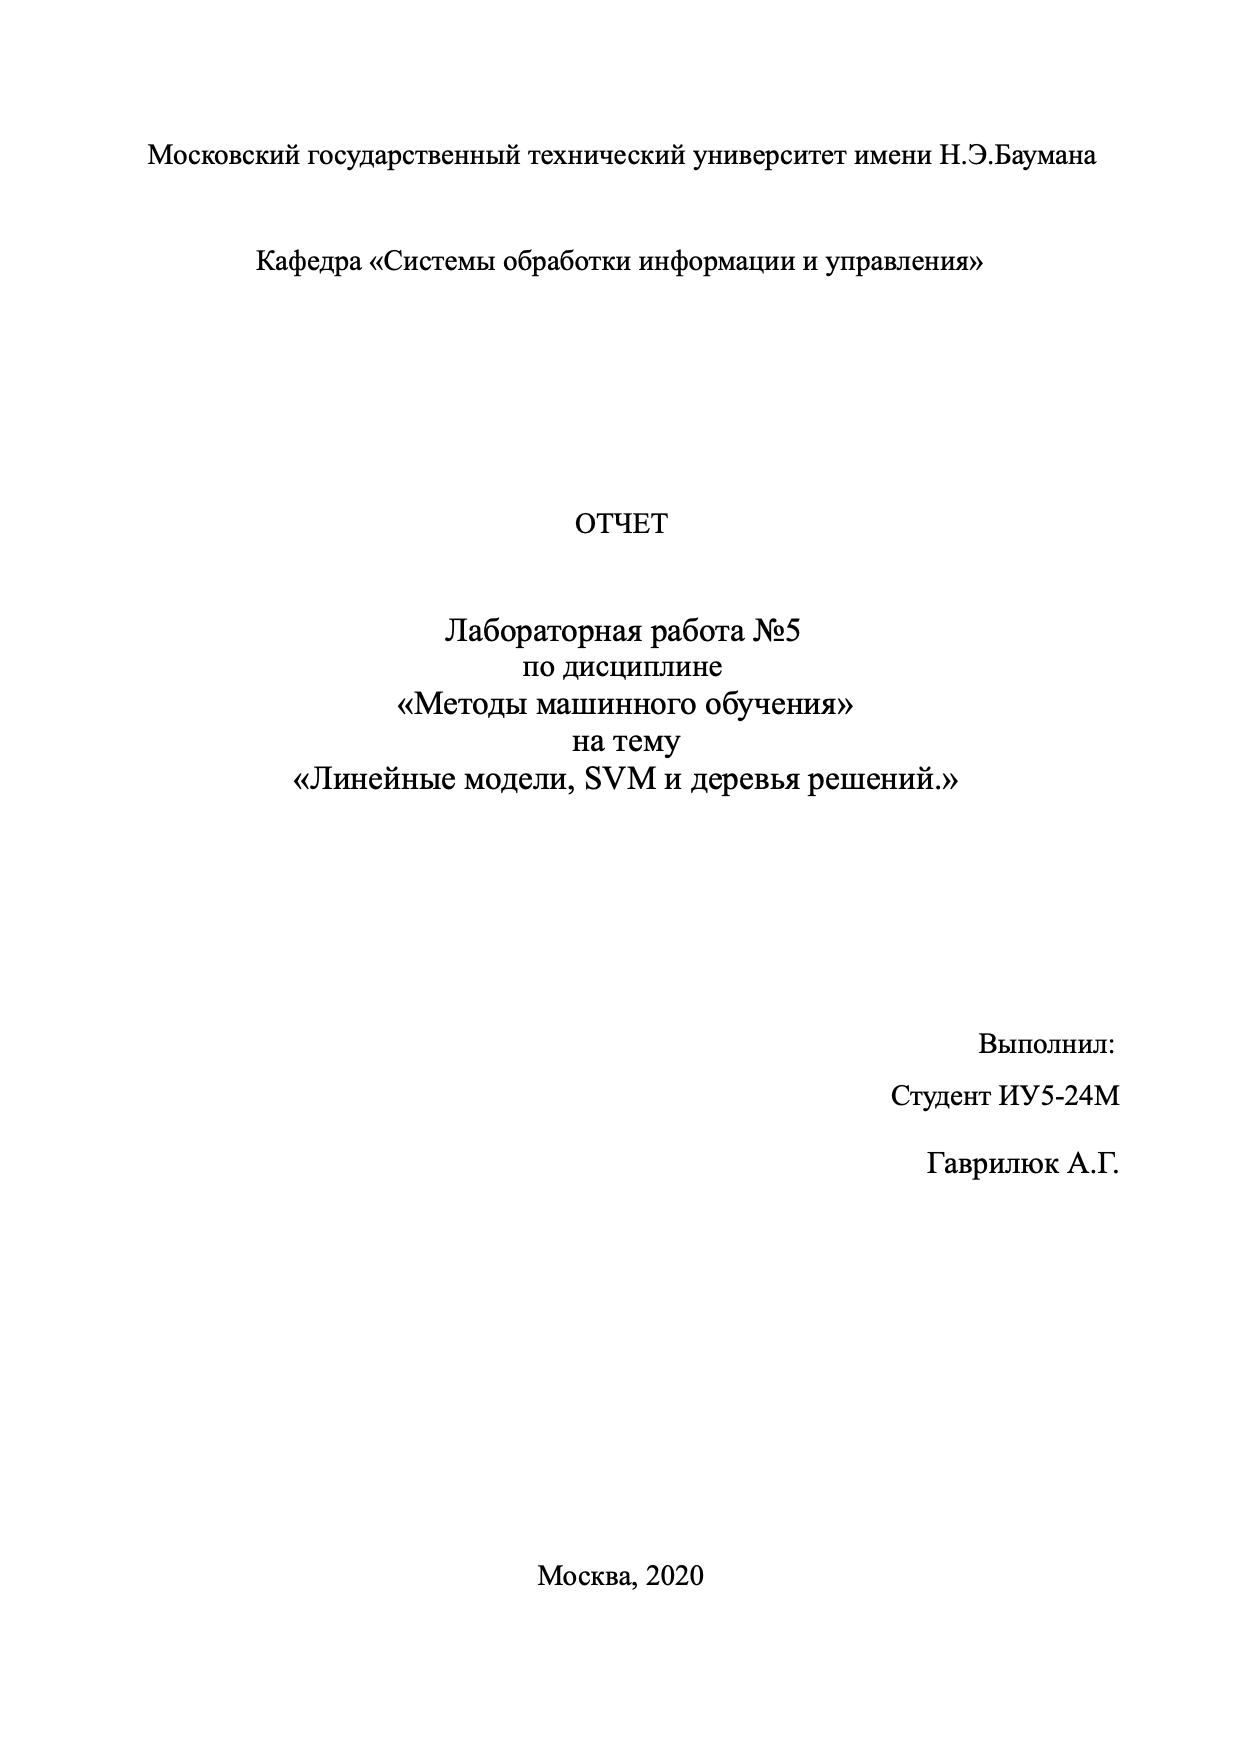

#### Задание:
Выберите набор данных (датасет) для решения задачи классификации или регрессии.
В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите следующие модели:
одну из линейных моделей;
SVM;
дерево решений.
Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.
Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.
Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("Admission_Predict.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

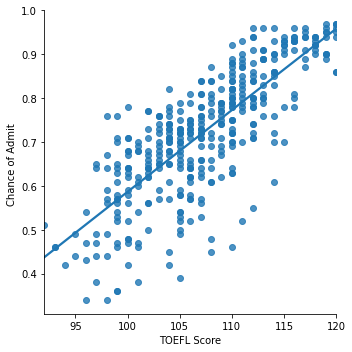

In [9]:
sns.lmplot(x="TOEFL Score", y="Chance of Admit ", data=data, order=2, ci=None)

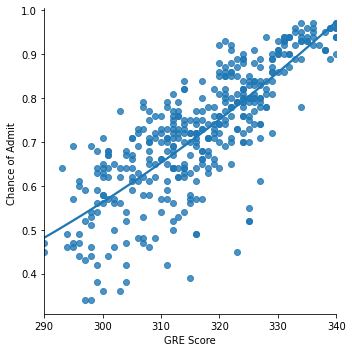

In [11]:
sns.lmplot(x="GRE Score", y="Chance of Admit ", data=data, order=2, ci=None)

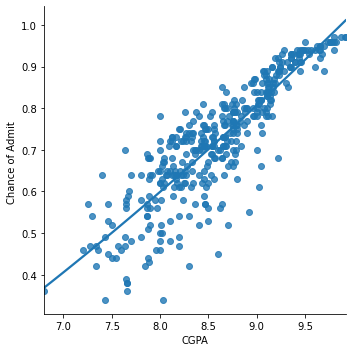

In [12]:
sns.lmplot(x="CGPA", y="Chance of Admit ", data=data, order=2, ci=None)

In [10]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [13]:
x = data["CGPA"].values
y = data["Chance of Admit "].values

reg = BayesianRidge(fit_intercept=True).fit(x.reshape(-1, 1), y.reshape(-1, 1))
reg.coef_
reg.intercept_

/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-1.07011083805518

In [14]:
def func(w, b, x):
    return w * x + b

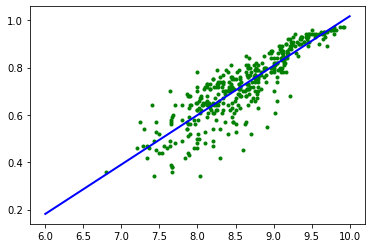

In [22]:
x_t = list(range(6, 11))
y_t = [func(reg.coef_[0], reg.intercept_, x) for x in x_t]
y_tt = reg.predict(x.reshape(-1, 1))


plt.plot(x, y, 'g.')
plt.plot(x_t, y_t, 'b', linewidth=2.0)
plt.show()

In [23]:
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR

/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


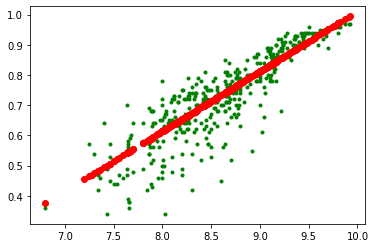

In [24]:
lin_SVR = LinearSVR(C=1.0, max_iter=10000)
lin_SVR.fit(x.reshape(-1, 1), y)
predict = lin_SVR.predict(x.reshape(-1, 1))
plt.plot(x, y, 'g.')
plt.plot(x, predict, 'ro')

In [29]:
dec_tree = DecisionTreeRegressor(random_state=1, max_depth=2)
dec_tree.fit(data, data["Chance of Admit "])
dec_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [30]:
from sklearn import tree
dec_predict = dec_tree.predict(data)

[Text(167.4, 181.2, 'X[8] <= 0.705\nmse = 0.02\nsamples = 400\nvalue = 0.724'),
 Text(83.7, 108.72, 'X[8] <= 0.555\nmse = 0.008\nsamples = 165\nvalue = 0.588'),
 Text(41.85, 36.23999999999998, 'mse = 0.003\nsamples = 50\nvalue = 0.469'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.002\nsamples = 115\nvalue = 0.639'),
 Text(251.10000000000002, 108.72, 'X[8] <= 0.835\nmse = 0.006\nsamples = 235\nvalue = 0.82'),
 Text(209.25, 36.23999999999998, 'mse = 0.001\nsamples = 137\nvalue = 0.761'),
 Text(292.95, 36.23999999999998, 'mse = 0.002\nsamples = 98\nvalue = 0.904')]

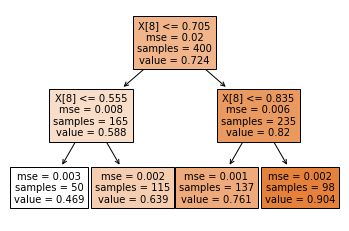

In [31]:
tree.plot_tree(dec_tree, filled=True)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 

print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, y_tt))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, y_tt))
print("Коэффициент детерминации: ", r2_score(y, y_tt))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, predict))
print("Коэффициент детерминации: ", r2_score(y, predict))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, dec_predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, dec_predict))
print("Коэффициент детерминации: ", r2_score(y, dec_predict))

Метрики для линейной модели:

Средняя абсолютная ошибка:  0.05104503741170578
Средняя квадратичная ошибка:  0.004815356189900225
Коэффициент детерминации:  0.7626333870313893


Метрики для SVM-модели:

Средняя абсолютная ошибка:  0.05048348999524928
Средняя квадратичная ошибка:  0.0049113689299560065
Коэффициент детерминации:  0.7579005660291389


Метрики для Decision Tree:

Средняя абсолютная ошибка:  0.03445446715328467
Средняя квадратичная ошибка:  0.0017170380603501324
Коэффициент детерминации:  0.9153608803480956


In [33]:
from sklearn.model_selection import cross_validate

In [34]:
scoring = {'mean': 'neg_mean_absolute_error', 'square': 'neg_mean_squared_error', 'r2': 'r2'}
scores_regr = cross_validate(BayesianRidge(fit_intercept=True), x.reshape(-1, 1), y, cv=3, scoring=scoring)
scores_regr

{'fit_time': array([0.00100613, 0.0006609 , 0.0009222 ]),
 'score_time': array([0.00087094, 0.00096798, 0.00104594]),
 'test_mean': array([-0.0716128 , -0.04348902, -0.04577832]),
 'test_square': array([-0.00971581, -0.00279908, -0.0035624 ]),
 'test_r2': array([0.64987987, 0.74535865, 0.80736343])}

In [35]:
scores_svm = cross_validate(LinearSVR(C=1.0, max_iter=10000), 
                         x.reshape(-1, 1), y, cv=3, scoring=scoring)
scores_svm

/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'fit_time': array([0.02764702, 0.02198672, 0.02688718]),
 'score_time': array([0.00075412, 0.00156617, 0.00119877]),
 'test_mean': array([-0.07574868, -0.04028163, -0.0457559 ]),
 'test_square': array([-0.01079283, -0.00244456, -0.00355868]),
 'test_r2': array([0.61106854, 0.7776104 , 0.80756491])}

In [37]:
scores_dec = cross_validate(DecisionTreeRegressor(random_state=1, max_depth=3), 
                         data, data["Chance of Admit "], cv=5, scoring=scoring)
scores_dec

{'fit_time': array([0.00444412, 0.00273585, 0.00238109, 0.00234079, 0.00249195]),
 'score_time': array([0.001863  , 0.00152016, 0.00166106, 0.00128818, 0.00138783]),
 'test_mean': array([-0.01870436, -0.02000891, -0.01670752, -0.01697581, -0.02027721]),
 'test_square': array([-0.00055445, -0.00066768, -0.0004061 , -0.00040907, -0.00065116]),
 'test_r2': array([0.97950964, 0.97375859, 0.96674048, 0.96134872, 0.97062417])}

In [38]:
print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_regr['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_regr['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_regr['test_r2']))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_svm['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_svm['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_svm['test_r2']))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_dec['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_dec['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_dec['test_r2']))

Метрики для линейной модели:

Средняя абсолютная ошибка:  -0.05362670974848763
Средняя квадратичная ошибка:  -0.005359098126698869
Коэффициент детерминации:  0.734200649353169


Метрики для SVM-модели:

Средняя абсолютная ошибка:  -0.05392873725436854
Средняя квадратичная ошибка:  -0.005598687258181815
Коэффициент детерминации:  0.7320812849700434


Метрики для Decision Tree:

Средняя абсолютная ошибка:  -0.018534761073709237
Средняя квадратичная ошибка:  -0.0005376912342868803
Коэффициент детерминации:  0.9703963193456253


In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
n_range = np.array(range(1,10,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [41]:
%%time
clf_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='r2')
clf_gs.fit(x.reshape(-1, 1), y)

CPU times: user 53.6 ms, sys: 2.17 ms, total: 55.8 ms
Wall time: 55 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [42]:
clf_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
clf_gs.best_score_, clf_gs.best_params_

(0.744873963342546, {'max_depth': 4})

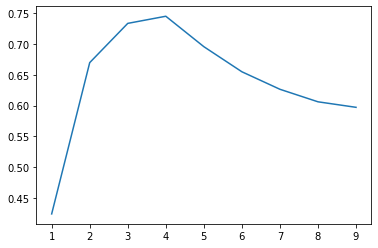

In [45]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [46]:
param_grid = {'C': [0.1,1, 10, 100], 'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [47]:
grid = GridSearchCV(LinearSVR(),param_grid,refit=True,verbose=2)
grid.fit(x.reshape(-1, 1),y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.2 ..............................................
[CV] ............................... C=0.1, epsilon=0.2, total=   0.0s
[CV] C=0.1, epsilon=0.2 ..............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of it

[CV] ................................ C=10, epsilon=0.1, total=   0.0s
[CV] C=10, epsilon=0.1 ...............................................
[CV] ................................ C=10, epsilon=0.1, total=   0.0s
[CV] C=10, epsilon=0.1 ...............................................
[CV] ................................ C=10, epsilon=0.1, total=   0.0s
[CV] C=10, epsilon=0.1 ...............................................
[CV] ................................ C=10, epsilon=0.1, total=   0.0s
[CV] C=10, epsilon=0.2 ...............................................
[CV] ................................ C=10, epsilon=0.2, total=   0.0s
[CV] C=10, epsilon=0.2 ...............................................
[CV] ................................ C=10, epsilon=0.2, total=   0.0s
[CV] C=10, epsilon=0.2 ...............................................
[CV] ................................ C=10, epsilon=0.2, total=   0.0s
[CV] C=10, epsilon=0.2 ...............................................
[CV] .

/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                     0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [48]:
grid.best_estimator_

(LinearSVR(C=10, dual=True, epsilon=0.1, fit_intercept=True,
           intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
           random_state=None, tol=0.0001, verbose=0),
 0.7034991070076)

In [49]:
grid.best_score_, grid.best_params_

(0.7034991070076, {'C': 10, 'epsilon': 0.1})

In [50]:
parameters = {"alpha_1": np.logspace(-13,-5,10),
              "alpha_2": np.logspace(-9,-3,10),
              "lambda_1": np.logspace(-10,-5,10),
              "lambda_2": np.logspace(-11,-4,10)}

grid_regr = GridSearchCV(BayesianRidge(), parameters, cv=3, n_jobs=-1)
grid_regr.fit(x.reshape(-1, 1), y)

GridSearchCV(cv=3, error_score=nan,
             estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                     alpha_init=None, compute_score=False,
                                     copy_X=True, fit_intercept=True,
                                     lambda_1=1e-06, lambda_2=1e-06,
                                     lambda_init=None, n_iter=300,
                                     normalize=False, tol=0.001,
                                     verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha_1': array([1.00000000e-13, 7.74263683e-13, 5.99484250e-...
                         'lambda_1': array([1.00000000e-10, 3.59381366e-10, 1.29154967e-09, 4.64158883e-09,
       1.66810054e-08, 5.99484250e-08, 2.15443469e-07, 7.74263683e-07,
       2.78255940e-06, 1.00000000e-05]),
                         'lambda_2': array([1.00000000e-11, 5.99484250e-11, 3.59381366e-10, 2.15443469e-09,
       1.29154967e-08, 7.74263683e-08

In [51]:
grid_regr.best_estimator_

BayesianRidge(alpha_1=1e-05, alpha_2=1e-09, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-10, lambda_2=0.0001, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [52]:
grid_regr.best_score_, grid_regr.best_params_

(0.7342007111758907,
 {'alpha_1': 1e-05, 'alpha_2': 1e-09, 'lambda_1': 1e-10, 'lambda_2': 0.0001})

In [53]:
reg = BayesianRidge(
    fit_intercept=True, alpha_1=1e-05, alpha_2=1e-09, lambda_1=1e-10, lambda_2=0.0001
).fit(
    x.reshape(-1, 1), y.reshape(-1, 1)
)
y_tt = reg.predict(x.reshape(-1, 1))

lin_SVR = LinearSVR(C=1.0, max_iter=10000, epsilon=1.0)
lin_SVR.fit(x.reshape(-1, 1), y)
predict = lin_SVR.predict(x.reshape(-1, 1))

dec_tree = DecisionTreeRegressor(random_state=1, max_depth=3)
dec_tree.fit(data, data["Chance of Admit "])
dec_predict = dec_tree.predict(data)

/Users/alexandr/Учеба/Мага/mmo/env/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, y_tt))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, y_tt))
print("Коэффициент детерминации: ", r2_score(y, y_tt))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, predict))
print("Коэффициент детерминации: ", r2_score(y, predict))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, dec_predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, dec_predict))
print("Коэффициент детерминации: ", r2_score(y, dec_predict))

Метрики для линейной модели:

Средняя абсолютная ошибка:  0.05104503964708347
Средняя квадратичная ошибка:  0.004815356104829768
Коэффициент детерминации:  0.762633391224825


Метрики для SVM-модели:

Средняя абсолютная ошибка:  0.72435
Средняя квадратичная ошибка:  0.5449695
Коэффициент детерминации:  -25.86355054222429


Метрики для Decision Tree:

Средняя абсолютная ошибка:  0.018912063108038904
Средняя квадратичная ошибка:  0.00048484761255577493
Коэффициент детерминации:  0.9761000783618737
